In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics

### Load iris data from CSV file

In [2]:
df = pd.read_csv('data/iris.csv')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
print(df.shape)

(150, 5)


### Split into training and test data

In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [5]:
print(df.species.value_counts())

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64


In [6]:
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix

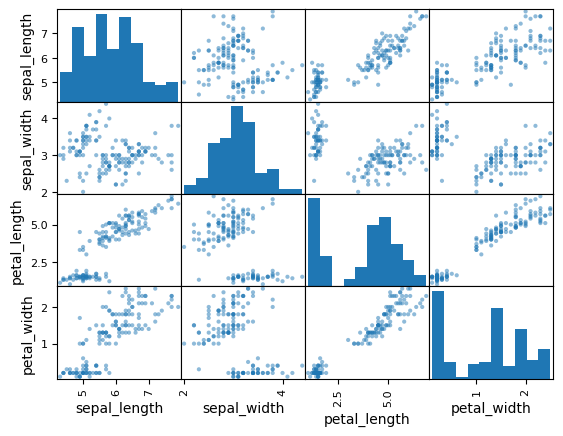

In [7]:
pd.plotting.scatter_matrix(df)
plt.show()

In [8]:
d = df.to_numpy()
print(d[d[:,4] == "setosa",0])

[5.1 4.9 4.7 4.6 5.0 5.4 4.6 5.0 4.4 4.9 5.4 4.8 4.8 4.3 5.8 5.7 5.4 5.1
 5.7 5.1 5.4 5.1 4.6 5.1 4.8 5.0 5.0 5.2 5.2 4.7 4.8 5.4 5.2 5.5 4.9 5.0
 5.5 4.9 4.4 5.1 5.0 4.5 4.4 5.0 5.1 4.8 5.1 4.6 5.3 5.0]


In [9]:
import numpy as np

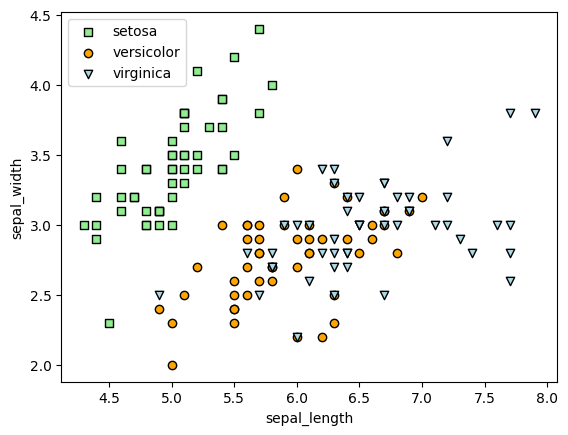

In [10]:
# sepal_length and sepal_width for each species?
d = np.array(df)
plt.scatter(
 d[d[:,4] == "setosa", 0], d[d[:,4] == "setosa", 1],
 c='lightgreen', marker='s', edgecolor='black',
 label='setosa'
)
plt.scatter(
 d[d[:,4] == "versicolor", 0], d[d[:,4] == "versicolor", 1],
 c='orange', marker='o', edgecolor='black',
 label='versicolor'
)
plt.scatter(
 d[d[:,4] == "virginica", 0], d[d[:,4] == "virginica", 1],
 c='lightblue', marker='v', edgecolor='black',
 label='virginica'
)
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend(loc="upper left")
plt.show()

**[[:,4] == "setosa" is a row condition that picks about all rows where value of column index 4 is better **

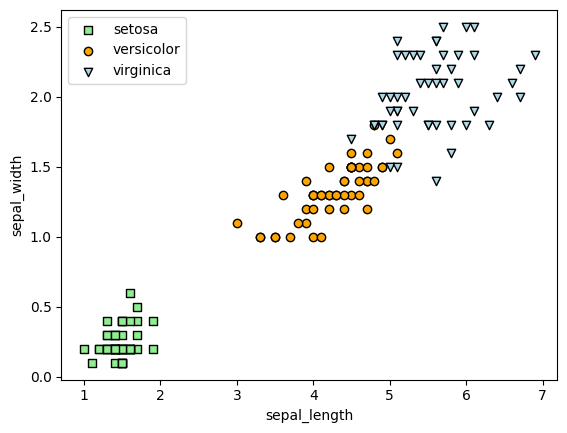

In [11]:
# petal_length and petal_width for each species?
d = np.array(df)
plt.scatter(
 d[d[:,4] == "setosa", 2], d[d[:,4] == "setosa", 3],
 c='lightgreen', marker='s', edgecolor='black',
 label='setosa'
)
plt.scatter(
 d[d[:,4] == "versicolor", 2], d[d[:,4] == "versicolor", 3],
 c='orange', marker='o', edgecolor='black',
 label='versicolor'
)
plt.scatter(
 d[d[:,4] == "virginica", 2], d[d[:,4] == "virginica", 3],
 c='lightblue', marker='v', edgecolor='black',
 label='virginica'
)
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend(loc="upper left")
plt.show()

In [12]:
### petal length and petal_width seem to work very well. Easy to seperate setosa. 

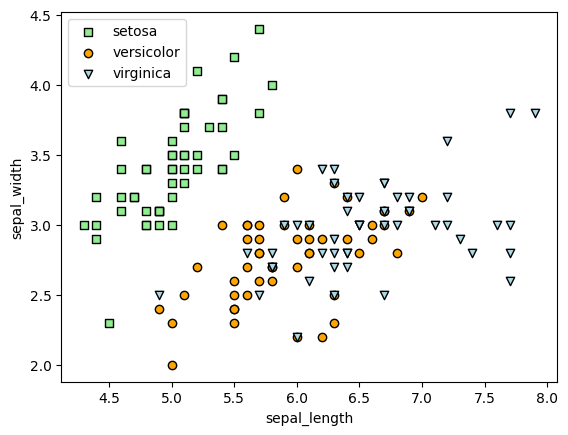

In [13]:
# sepal_length and sepal_width for each species?
d = np.array(df)
plt.scatter(
 d[d[:,4] == "setosa", 0], d[d[:,4] == "setosa", 1],
 c='lightgreen', marker='s', edgecolor='black',
 label='setosa'
)
plt.scatter(
 d[d[:,4] == "versicolor", 0], d[d[:,4] == "versicolor", 1],
 c='orange', marker='o', edgecolor='black',
 label='versicolor'
)
plt.scatter(
 d[d[:,4] == "virginica", 0], d[d[:,4] == "virginica", 1],
 c='lightblue', marker='v', edgecolor='black',
 label='virginica'
)
plt.xlabel('sepal_length')
plt.ylabel('sepal_width')
plt.legend(loc="upper left")
plt.show()

In [14]:
X = df.drop(columns = ['species'])
X.shape
y = df['species']
y.shape

(150,)

In [15]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = .30, random_state = 1, stratify = y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_train.shape)

(105, 4)
(105,)
(45, 4)
(105,)


### Fit to a DecisionTreeClassifier with max_depth=2

In [16]:
from sklearn.model_selection import cross_val_score


In [17]:
for d in range(2,20) :
 tree = DecisionTreeClassifier(max_depth=d)
 scores = cross_val_score(tree, X_train, y_train, cv=5)
 print("d: ",d, " Val Accuracy: ",scores.mean())

d:  2  Val Accuracy:  0.9333333333333332
d:  3  Val Accuracy:  0.9333333333333332
d:  4  Val Accuracy:  0.9238095238095237
d:  5  Val Accuracy:  0.9428571428571428
d:  6  Val Accuracy:  0.9428571428571428
d:  7  Val Accuracy:  0.9333333333333332
d:  8  Val Accuracy:  0.9428571428571428
d:  9  Val Accuracy:  0.9428571428571428
d:  10  Val Accuracy:  0.9333333333333333
d:  11  Val Accuracy:  0.9333333333333332
d:  12  Val Accuracy:  0.9428571428571428
d:  13  Val Accuracy:  0.9523809523809523
d:  14  Val Accuracy:  0.9428571428571428
d:  15  Val Accuracy:  0.9428571428571428
d:  16  Val Accuracy:  0.9523809523809523
d:  17  Val Accuracy:  0.9428571428571428
d:  18  Val Accuracy:  0.9238095238095237
d:  19  Val Accuracy:  0.9333333333333333


In [18]:
# tree = DecisionTreeClassifier(max_depth = 2)
tree = DecisionTreeClassifier(max_depth = 4)
tree.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=4)

### Find the accuracy and confusion matrix.

In [19]:
print("Training Accuracy:", tree.score(X_train, y_train))

Training Accuracy: 0.9714285714285714


In [20]:
print("Test Accuracy:", tree.score(X_test, y_test))

Test Accuracy: 0.9777777777777777


In [21]:
y_predict = tree.predict(X_test)
print("The Accuracy is: ", metrics.accuracy_score(y_test, y_predict))

The Accuracy is:  0.9777777777777777


### max_depth 2 accuracy is 0.9555
### max_depth 3 accuracy is 0.9777
### max_depth 4 accuray is 0.9777

In [22]:
ConMat = confusion_matrix(y_test, y_predict)
print("The confusion Matrix is: ")
print(ConMat)

The confusion Matrix is: 
[[15  0  0]
 [ 0 15  0]
 [ 0  1 14]]


### Plot the decision tree

In [23]:
from sklearn.tree import export_graphviz
from io import StringIO
from IPython.display import Image
import pydotplus

In [24]:
feature_names = ["sepal_length","sepal_width","petal_length","petal_width"]
target_names = ["setosa", "versicolor", "virginica"]
dot_data = StringIO()
export_graphviz(tree, out_file=dot_data,filled=True, rounded=True,special_characters=True, feature_names = feature_names,class_names = target_names)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
# graph.write_png('plots/iris.png')
Image(graph.create_png())

InvocationException: GraphViz's executables not found